# Exercise: Derivatives


In [2]:
import numpy as np
import matplotlib.pyplot as plt 

### Load data

In [3]:
data = np.loadtxt("04b_Exercise_velocity_acceleration_data_file.dat")

In [4]:
data

array([[  0.        ,   1.        ],
       [  0.1       ,   1.01980001],
       [  0.2       ,   1.03920011],
       ...,
       [ 99.8       ,  15.25565932],
       [ 99.9       ,  15.33160759],
       [100.        ,  15.40808206]])

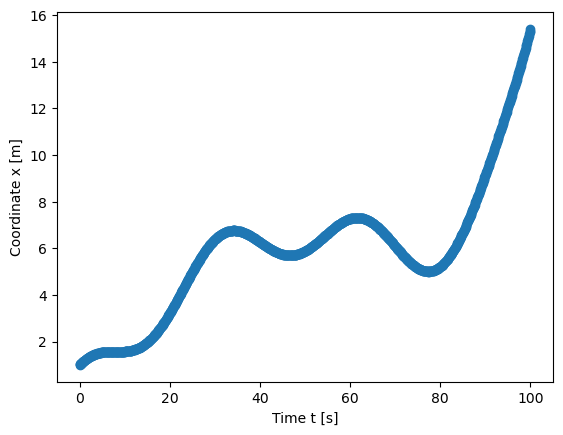

In [5]:
plt.xlabel('Time t [s]')
plt.ylabel('Coordinate x [m]')
plt.scatter(data[:,0],data[:,1])

### Task

Calculate the velocity $v(t)=\dot{x}(t)$ and the acceleration $a(t)=\ddot{x}(t)$ for the loaded data set that describes a set of points $(t_i,x_i)$ for $i=0,\dots,1000$.

1. Calculate $v_i$ and $a_i$ using the forward-differences, central-differences and Richardson methods
2. Determine the maximum value of the acceleration and the corresponding time.

Be careful, now we do not know the function $x(t)$ but only its values for specific points. You have to define the functions for the derivativesa bit differently.

### Solution

In [6]:
def forward(data):
    derive = np.zeros(len(data[:,1]))
    derive[:-1] = (data[1:, 1] - data[:-1, 1]) / (data[1:, 0] - data[:-1, 0])
    derive[-1] = (data[-1, 1] - data[-2, 1]) / (data[-1, 0] - data[-2, 0])
    return np.transpose([data[:, 0], derive])

In [7]:
velocityForward = forward(data)   
accelerationForward = forward(forward(data))

In [8]:
def central(data):
    derive = np.zeros(len(data[:,1]))
    derive[1:-1] = (data[2:,1] - data[:-2, 1]) / (data[2:,0] - data[:-2,0])
    derive[0] = (data[1,1] - data[0,1]) / (data[1,0] - data[0,0])
    derive[-1] = (data[-1,1] - data[-2,1]) / (data[-1,0] - data[-2,0])
    return np.transpose([data[:,0], derive])

In [9]:
velocityCentral = central(data)  
accelerationCentral = central(central(data))

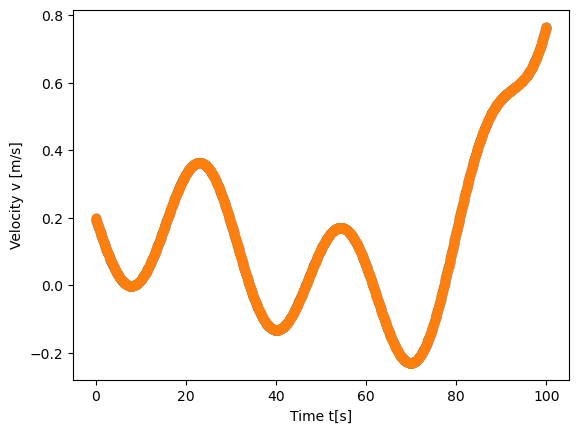

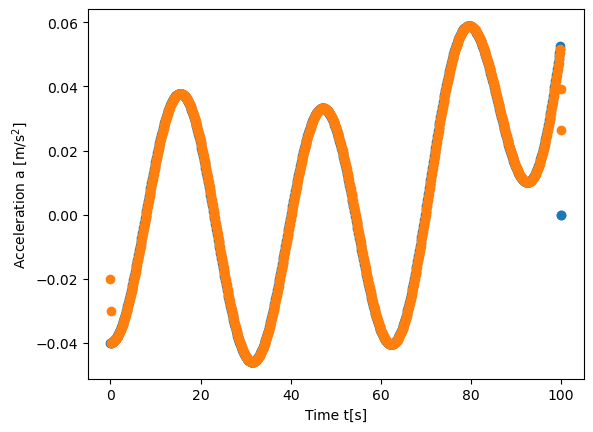

In [10]:
plt.xlabel('Time t[s]')
plt.ylabel('Velocity v [m/s]')
plt.scatter(velocityForward[:,0], velocityForward[:,1])
plt.scatter(velocityCentral[:,0], velocityCentral[:,1])
plt.show()

plt.xlabel('Time t[s]')
plt.ylabel('Acceleration a [m/s$^2$]')
plt.scatter(accelerationForward[:,0], accelerationForward[:,1])
plt.scatter(accelerationCentral[:,0], accelerationCentral[:,1])
plt.show()

**How the data was generated**

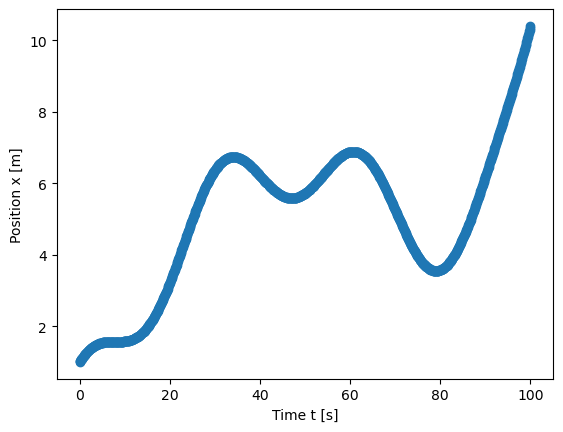

In [11]:
a = 0.2
b = 0.9e-8
c = -1e-6
d = 0.2 

def position(t):
    return np.cos(a*t) + b*t**5 + c*t**4 + d*t

tList = np.linspace(0, 100, 1001)
xList = position(tList)

plt.xlabel('Time t [s]')
plt.ylabel('Position x [m]')
plt.scatter(tList, xList)

In [12]:
data = np.transpose([tList, xList])
data

array([[  0.        ,   1.        ],
       [  0.1       ,   1.01980001],
       [  0.2       ,   1.03920011],
       ...,
       [ 99.8       ,  10.30545972],
       [ 99.9       ,  10.35655764],
       [100.        ,  10.40808206]])

**Compare with analytical solution**

In [13]:
def velocity(t):
    return -a*np.sin(a*t) + 5*b*t**4 + 4*c*t**3 + d

def acceleration(t):
    return -a**2*np.cos(a*t) + 20*b*t**3 + 12*c*t**2

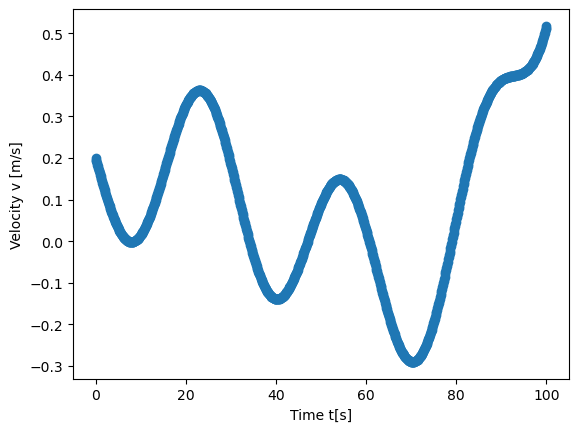

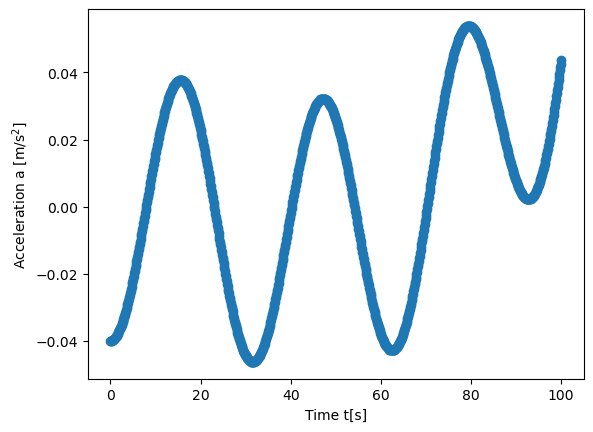

In [14]:
tList = np.linspace(0, 100, 1001)
vList = velocity(tList)
aList = acceleration(tList)

plt.xlabel('Time t[s]')
plt.ylabel('Velocity v [m/s]')
plt.scatter(tList, vList)
plt.show()

plt.xlabel('Time t[s]')
plt.ylabel('Acceleration a [m/s$^2$]')
plt.scatter(tList, aList)
plt.show()